In [10]:
# Parameter sensitivity analysis

using DiffEqSensitivity
using DifferentialEquations
using LinearAlgebra
using Plots
pyplot();
function f(du,u,p,t)
  du[1] = dx = p[1]*u[1] - p[2]*u[1]*u[2]
  du[2] = dy = -p[3]*u[2] + u[1]*u[2]
end

p = [1.5,1.0,3.0]
#p = nothing
prob = ODELocalSensitivityProblem(f,[1.0;1.0],(0.0,100.0),p,SensitivityAlg())
sol = solve(prob,DP8())


retcode: Success
Interpolation: specialized 7th order interpolation
t: 238-element Array{Float64,1}:
   0.0                  
   0.0008156803234081559
   0.005709762263857092 
   0.0350742539065507   
   0.21126120376271237  
   0.731069931766155    
   1.540215738099472    
   1.8813383864607442   
   2.152558059543276    
   2.4063024219153015   
   2.6976828352683677   
   3.031247293246129    
   3.4850598062654106   
   ⋮                    
  95.58412355502048     
  95.94271394284344     
  96.57378778531474     
  97.18889347010192     
  97.83721590470614     
  98.23075566319164     
  98.48835856777333     
  98.77012139451881     
  99.03851170654656     
  99.3955333999574      
  99.97826107590339     
 100.0                  
u: 238-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                        
 [1.00041, 0.99837, 0.000816014, 3.32215e-7, -0.000815348, -3.32035e-7, 3.32441e-7, -0.000814351]
 [1.00289, 

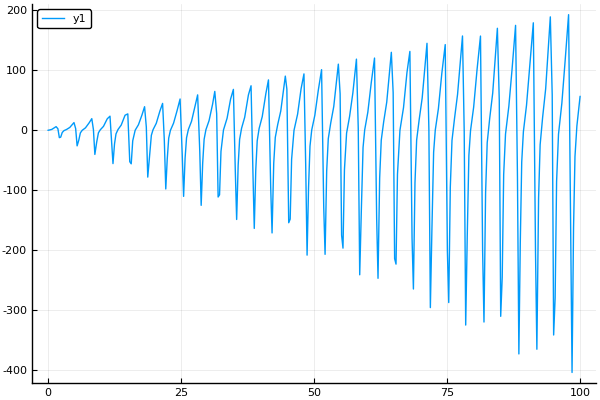

In [31]:
x,dp = extract_local_sensitivities(sol)
dp1=dp[1]'
dp1u1=dp1[:,1]
plot(sol.t,dp1u1)

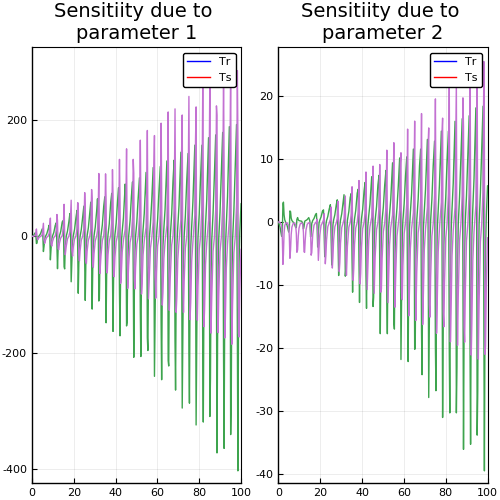

In [13]:
x,dp = extract_local_sensitivities(sol)
da = dp[1]
db = dp[2]
dc = dp[3]
plot(1,1,lc=:blue,label="Tr")
plot!(1,1,lc=:red,label="Ts")
plot!(sol.t,da',label="")
a=plot!(title="Sensitiity due to \nparameter 1",legend=:topright)
plot(1,1,lc=:blue,label="Tr")
plot!(1,1,lc=:red,label="Ts")
plot!(sol.t,db',label="")
b=plot!(title="Sensitiity due to \nparameter 2",legend=:topright)
plot(1,1,lc=:blue,label="Tr")
plot!(1,1,lc=:red,label="Ts")
plot!(sol.t,dc',label="")
c=plot!(title="Sensitiity due to \nparameter c",legend=:topright)
plot(a,b,layout=grid(1,2), size=(500,500))
plot!(xlim=(0,100),reuse=false, frame=:box,size=(500,500))
#plot!(sol.t,dx2dp1', lw=2,lc=:black, label="dTsdp1")
#plot!(sol.t,db',lw=3)
#plot!(sol.t,dc',lw=3)

In [44]:
using DiffEqSensitivity
using DifferentialEquations
using LinearAlgebra
using Plots
using LaTeXStrings
pyplot();
function gen(dx,x,p,t)
    # unpacking states
    Tr = x[1]
    Ts = x[2]
    TFe = x[3]
    # upacking inputs
    Twc = p[1]
    Ifd = p[2]
    It = p[3]
    QdFes = p[4]
    Wdf = p[5]
    mdw = p[6]
    mda = p[7]
    chpa = p[8]
    chpw = p[9]
    chpCu = p[10]
    chpFe = p[11]
    
    mr = p[12]
    ms = p[13]
    mFe = p[14]
    
    UAr2d = p[15]
    UAs2Fe = p[16]
    UAFe2a = p[17]
    hAax = p[18]
    hAwx = p[19]
    
    Rr = p[20]
    Rs = p[21]
    
    UAx = 1/(1/hAax+1/hAwx)
    
    # Nominal inputs
    #Twc = 3.8
    #mdw = 53.9
    #mda = 49.2
    #Ifd = 1055.
    #It = 5360.
    #QdFes = 212.
    #Wdf = 528.
    Qdfs = 0.8*Wdf
    # Stanton numbers
    NSta = UAx/chpa/mda
    NStw = UAx/chpw/mdw
    NStd = NStw - NSta
    # Matrices
    M1 = diagm(0=>[mr*chpCu , ms*chpCu , mFe*chpFe])
    M2 = [-UAr2d 0. 0.; 0. -UAs2Fe UAs2Fe; 0. UAs2Fe -UAs2Fe-UAFe2a]
    M3 = [0. UAr2d 0.; 0. 0. 0.; 0. 0. UAFe2a]
    #
    N1 = [-mda*chpa mda*chpa+UAr2d 0.; 0. -mda*chpa mda*chpa+UAFe2a; NStw-NSta*exp(-NStd) 0. -NStd]
    N2 = [UAr2d 0. 0.; 0. 0. UAFe2a; 0. 0. 0.]
    #
    v = [1.1*Rr*Ifd^2, 3*Rs*It^2, QdFes]
    w = [Qdfs, 0., NSta*(1-exp(-NStd))*Twc]
    #
    z = N1\(N2*x + w)
    dxdt = M1\(M2*x+M3*z + v)
    dx[1],dx[2],dx[3]=dxdt
end

p = [3.8,1055.,5360.,212.,528.,53.9,49.2,1.15,4.2,0.385,0.465,9260.,6827.,71200.,2.7,20.,14.3,55.6,222.,0.16e-3,3.5e-6]
# Initial states

#p = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

x0 = [94., 81., 70.]
# Time span
tspan = (0., 300*60.)
#print("hellow")
# Set up problem
#prob = ODEProblem(gen,x0,tspan,p)
# Solving model
#sol = solve(prob)
prob = ODELocalSensitivityProblem(gen,x0,tspan,p)
#print("hellow")
sol = solve(prob,DP8())
x,dp = extract_local_sensitivities(sol)
#Twc,Ifd,It,QdFes,Wdf,mdw,mda,chpa,chpw,
    #chpCu,chpFe,mr,ms,mFe,UAr2d,UAs2Fe,UAFe2a,hAax,hAwx,Rr,Rs=dp
dTwc,dIfd,dIt,dQdFes,dWdf,dmdw,dmda,dchpa,dchpw,dchpCu,dchpFe,dmr,dms,dmFe,dUAr2d,dUAs2Fe,dUAFe2a,dhAax,dhAwx,dRr,dRs=dp

21-element Array{Array{Float64,2},1}:
 [0.0 3.1232e-11 … 0.997546 0.997791; 0.0 2.85714e-21 … 0.990042 0.991035; 0.0 1.42184e-11 … 0.990389 0.991348]                     
 [0.0 5.50167e-12 … 0.150187 0.150191; 0.0 4.83595e-34 … 0.0124995 0.012519; 0.0 3.60988e-24 … 0.0125063 0.0125251]                 
 [0.0 7.07917e-35 … 0.00182976 0.00183261; 0.0 2.26185e-12 … 0.0172311 0.0172427; 0.0 3.6083e-23 … 0.0116072 0.0116183]             
 [0.0 4.69471e-24 … 0.0162647 0.0162891; 0.0 3.20567e-22 … 0.10312 0.103219; 0.0 1.59528e-12 … 0.103155 0.10325]                    
 [0.0 8.5409e-13 … 0.0272795 0.0272862; 0.0 7.8133e-23 … 0.0270743 0.0271015; 0.0 3.88825e-13 … 0.0270838 0.02711]                  
 [0.0 -1.0655e-12 … -0.0372162 -0.0372313; 0.0 -9.74729e-23 … -0.0368649 -0.036913; 0.0 -4.85069e-13 … -0.0368817 -0.0369282]       
 [0.0 -1.03395e-12 … -0.057755 -0.0578038; 0.0 -6.75065e-22 … -0.239631 -0.239931; 0.0 -3.35942e-12 … -0.239736 -0.240026]          
 [0.0 -4.4235e-11 … -2.47091 -2

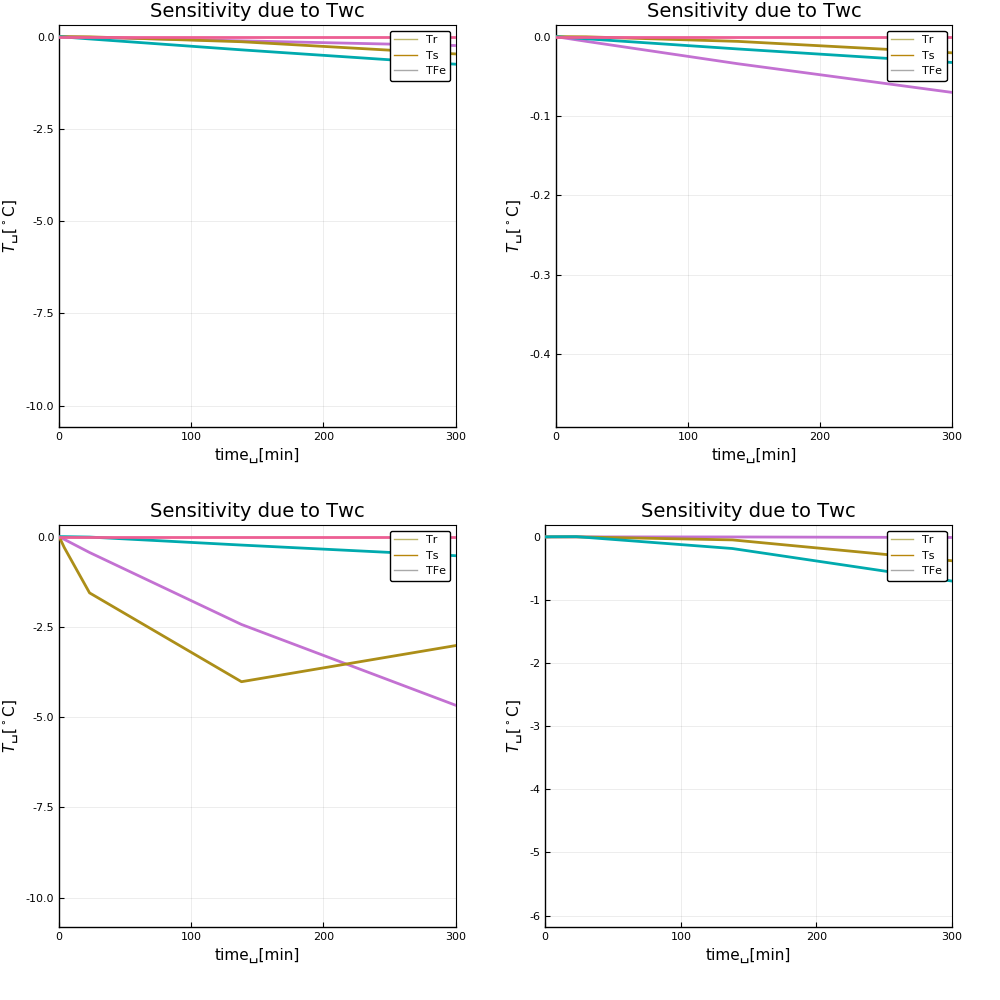

In [45]:

plot!(sol.t/60,dTwc[:,1]',lw=2,label="")
#plot!(sol.t/60,dTwc[1]',lw=2,label="")
plot!(xlabel="time␣[min]",ylabel=L"$T$␣[${}^\circ$C]" )
plot!(xlim=(0,300))
a=plot!(title="Sensitivity due to Twc",legend=:topright)

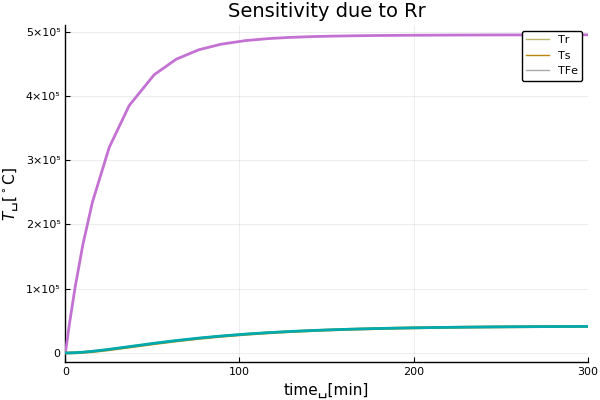

In [42]:
plot(1,1,lc=:darkkhaki,label="Tr")
plot!(1,1,lc=:darkgoldenrod,label="Ts")
plot!(1,1,lc=:darkgrey,label="TFe")
plot!(sol.t/60,dRr',lw=2,label="")
plot!(xlabel="time␣[min]",ylabel=L"$T$␣[${}^\circ$C]" )
plot!(xlim=(0,300))
b=plot!(title="Sensitivity due to Rr",legend=:topright)

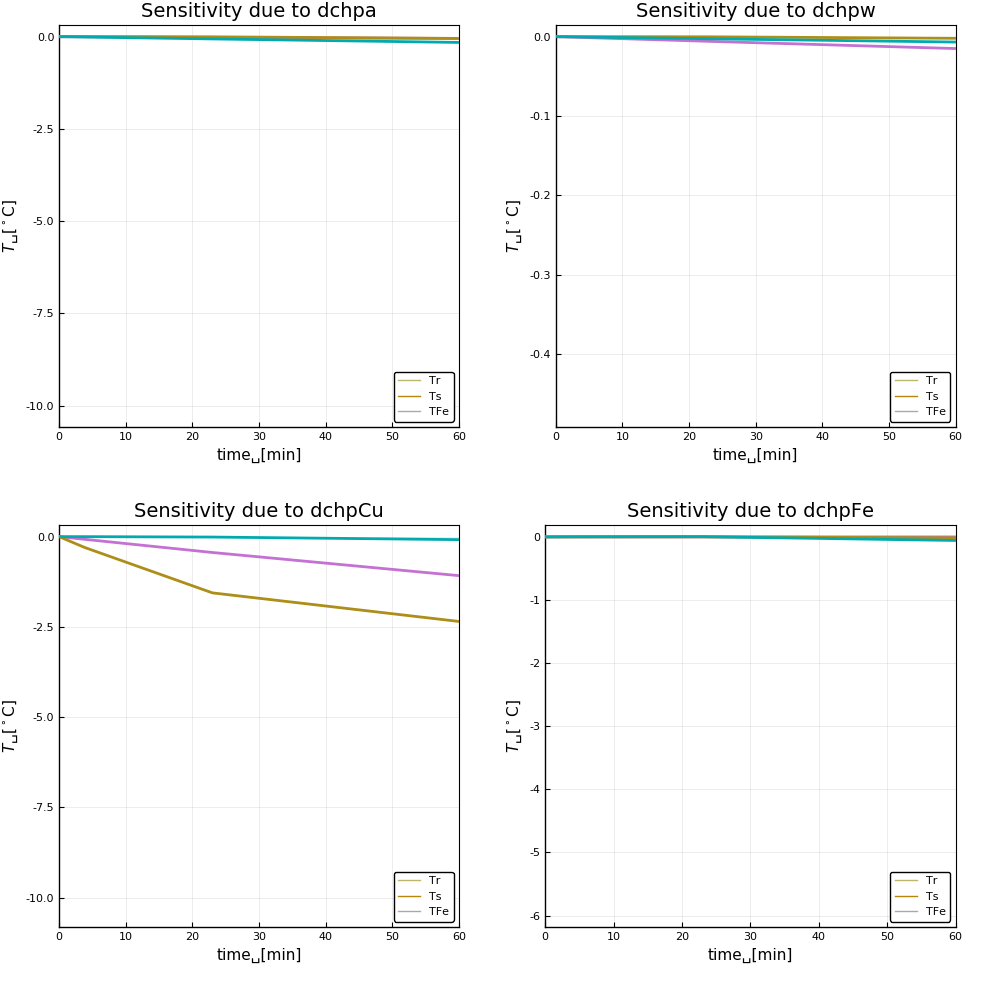

In [43]:
plot(1,1,lc=:darkkhaki,label="Tr")
plot!(1,1,lc=:darkgoldenrod,label="Ts")
plot!(1,1,lc=:darkgrey,label="TFe")
plot!(sol.t,dchpa',lw=2,label="")
plot!(xlabel="time␣[min]",ylabel=L"$T$␣[${}^\circ$C]" )
plot!(xlim=(0,60))
air=plot!(title="Sensitivity due to dchpa",legend=:topright)
plot(1,1,lc=:darkkhaki,label="Tr")
plot!(1,1,lc=:darkgoldenrod,label="Ts")
plot!(1,1,lc=:darkgrey,label="TFe")
plot!(sol.t,dchpw',lw=2,label="")
plot!(xlabel="time␣[min]",ylabel=L"$T$␣[${}^\circ$C]" )
plot!(xlim=(0,60))
water=plot!(title="Sensitivity due to dchpw",legend=:topright)
plot(1,1,lc=:darkkhaki,label="Tr")
plot!(1,1,lc=:darkgoldenrod,label="Ts")
plot!(1,1,lc=:darkgrey,label="TFe")
plot!(sol.t,dchpCu',lw=2,label="")
plot!(xlabel="time␣[min]",ylabel=L"$T$␣[${}^\circ$C]" )
plot!(xlim=(0,300))
copper=plot!(title="Sensitivity due to dchpCu",legend=:topright)
plot(1,1,lc=:darkkhaki,label="Tr")
plot!(1,1,lc=:darkgoldenrod,label="Ts")
plot!(1,1,lc=:darkgrey,label="TFe")
plot!(sol.t,dchpFe',lw=2,label="")
plot!(xlabel="time␣[min]",ylabel=L"$T$␣[${}^\circ$C]" )
plot!(xlim=(0,300))
iron=plot!(title="Sensitivity due to dchpFe",legend=:topright)
using Plots.PlotMeasures
plot(air,water,copper,iron,
        layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:bottomright)

#dchpa,dchpw,dchpCu,dchpFe